In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import numpy as np
import scipy
import astropy
from astropy.io import fits
import glob

In [39]:
files = []

for file in glob.glob('/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-*.fits'):
    print(file)
    files.append(fits.open(file))

/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16465982-0202241.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16471235-0153543.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16462176-0207594.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16471235-0153543.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16462176-0207594.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16465982-0202241.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16471180-0232095.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16470753-0157022.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16470791-0135506.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-r8-2M16470110-0239298.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16462642-0232208.fits
/users/mirandaviederman/Downloads/FITS Files/Matrix/ap

In [40]:
len(files)

20

In [41]:
#dir(files[0])

In [42]:
print(1,len(files))

1 20


In [43]:
files[0].info()

Filename: /users/mirandaviederman/Downloads/FITS Files/Matrix/apStar-t9-2M16465982-0202241.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     158   ()      
  1                1 ImageHDU        13   (8575, 5)   float32   
  2                1 ImageHDU        13   (8575, 5)   float32   
  3                1 ImageHDU        13   (8575, 5)   int16   
  4                1 ImageHDU        13   (8575, 5)   float32   
  5                1 ImageHDU        13   (8575, 5)   float32   
  6                1 ImageHDU        13   (8575, 5)   float32   
  7                1 ImageHDU        13   (8575, 5)   float32   
  8                1 ImageHDU        29   (26,)   float64   
  9                1 BinTableHDU     90   1R x 33C   [90A, 3I, 36A, 3J, 3I, 3D, 3E, 3E, 3E, 3E, 2I, 2E, 2E, 2E, 2E, E, E, E, E, E, 3E, 3E, 3E, 3E, 3E, 3E, 3E, 2005E, 2005E, 401E, D, D, 401E]   


In [44]:
info = files[0][1].data

In [45]:
info.shape

(5, 8575)

In [46]:
total_matrix = files[0][1].data

for k in range(1,len(files)):
    total_matrix = np.vstack((total_matrix,files[k][1].data))

In [47]:
total_matrix.shape

(81, 8575)

In [48]:
u,s,v = np.linalg.svd(total_matrix, full_matrices = False)

In [49]:
u.shape, s.shape, v.shape

((81, 81), (81,), (81, 8575))

In [50]:
u[0]

array([ -1.19812209e-02,  -2.43520271e-02,  -4.61413409e-04,
        -1.80826969e-02,   9.38926544e-03,  -1.60857048e-02,
         2.07335874e-02,  -7.90849328e-03,   3.69825251e-02,
        -4.56866473e-02,   2.32711202e-03,  -3.18534439e-04,
         1.44901043e-02,  -1.50109567e-02,   4.38517369e-02,
         8.63461848e-03,   2.28298511e-02,  -5.65391667e-02,
         1.03939595e-02,  -1.86599586e-02,   1.31241018e-02,
        -7.20220432e-03,   6.62177056e-02,  -3.78126418e-03,
         1.77779701e-02,  -7.39559084e-02,   1.44247105e-02,
        -1.85726248e-02,   4.12333310e-02,  -7.74062704e-03,
        -3.82237397e-02,   1.33018959e-02,  -1.56736478e-01,
         4.19642925e-02,  -3.61304656e-02,  -2.07072683e-03,
        -4.79091108e-02,   2.00672895e-02,   3.11571769e-02,
         3.10967006e-02,   9.34770796e-03,   5.77007374e-03,
         4.96545769e-02,   2.41829008e-01,  -2.34131977e-01,
        -2.38871202e-02,  -1.32254317e-01,   7.44979158e-02,
         5.04376814e-02,

In [51]:
u[1]

array([-0.01198003, -0.02363502, -0.00056557, -0.01808478,  0.01355717,
       -0.0218466 ,  0.02004333, -0.01030545,  0.04164858, -0.05961462,
        0.0096071 ,  0.00955861,  0.03201466, -0.02809969,  0.04034285,
        0.01518832,  0.02797076, -0.05359123,  0.01543022, -0.01417542,
        0.01842364, -0.01320327,  0.07798466,  0.00314299,  0.03531499,
       -0.03131276,  0.00968965, -0.01351455,  0.0353543 ,  0.00802274,
       -0.04875888,  0.00252122, -0.12459654,  0.06284586,  0.00466081,
        0.0167742 , -0.02784975,  0.02071902, -0.01772398, -0.00232563,
        0.10377033,  0.01523124,  0.01159056, -0.07716426,  0.13215283,
        0.02678249, -0.05086962, -0.01098073, -0.01596842,  0.04407393,
        0.12286763,  0.19135644, -0.20119311, -0.00823895, -0.06593734,
       -0.15662101, -0.01763657,  0.01169556, -0.03223423, -0.04479931,
       -0.10637462,  0.01557477, -0.08889989,  0.16649537, -0.02491343,
        0.17790031, -0.08053398, -0.13581008, -0.37299576, -0.21

In [52]:
len(u[0])

81

In [53]:
#for file in files:
    #crval1 = file[1].header['CRVAL1']
    #cdelt1 = file[1].header['CDELT1']
    #data = print(crval1*cdelt1)

In [54]:
#type(file[1].header['CDELT1'])

In [55]:
#files

In [56]:
u

array([[ -1.19812209e-02,  -2.43520271e-02,  -4.61413409e-04, ...,
          1.21705933e-03,   2.01525795e-03,   6.02993008e-04],
       [ -1.19800279e-02,  -2.36350242e-02,  -5.65569266e-04, ...,
         -8.50946293e-04,   7.62449694e-04,   9.81441117e-04],
       [ -1.19700488e-02,  -2.18097493e-02,  -9.75823321e-04, ...,
          5.05882781e-04,  -4.50337189e-04,  -1.73995286e-04],
       ..., 
       [ -9.14305728e-03,  -5.48170297e-04,  -1.17135318e-02, ...,
         -6.91197871e-04,  -4.11653979e-04,  -3.56018900e-05],
       [ -9.01954994e-03,  -1.18419691e-03,  -1.11217145e-02, ...,
          5.77798288e-04,   5.62622794e-04,  -7.26580547e-05],
       [ -4.03659403e-01,  -8.19767833e-01,   3.94124910e-02, ...,
         -3.08623385e-05,  -6.96441566e-05,  -1.91049076e-05]], dtype=float32)

In [57]:
s

array([  1.32804288e+06,   1.20378125e+05,   3.97510586e+04,
         2.49753789e+04,   1.46105273e+04,   1.33943369e+04,
         1.09085703e+04,   1.04540361e+04,   9.12223926e+03,
         7.99786914e+03,   7.55324268e+03,   6.57322852e+03,
         6.33645020e+03,   5.67429199e+03,   4.97257324e+03,
         4.45949756e+03,   4.29360254e+03,   4.07401636e+03,
         3.69890820e+03,   3.51775024e+03,   3.43939380e+03,
         3.18984863e+03,   2.93545996e+03,   2.63734619e+03,
         2.61038159e+03,   2.43604175e+03,   2.38422461e+03,
         2.35035156e+03,   2.19463232e+03,   2.11228491e+03,
         2.02445129e+03,   1.77185925e+03,   1.60853223e+03,
         1.48359460e+03,   1.37305884e+03,   1.33522205e+03,
         1.28857397e+03,   1.25789270e+03,   1.24473315e+03,
         1.20567737e+03,   1.16480554e+03,   1.12943542e+03,
         1.10109497e+03,   1.07337036e+03,   1.04901794e+03,
         9.87641052e+02,   9.10310669e+02,   8.71138977e+02,
         8.49323669e+02,

In [58]:
v

array([[  2.31785881e-16,   8.78695684e-18,   1.92429656e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -7.66577364e-16,  -8.17823082e-17,  -2.14338544e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.73791719e-16,  -7.17907407e-17,  -1.47650257e-16, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  7.87760021e-14,   4.77679275e-15,  -7.36950322e-16, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.79477391e-13,  -9.46880259e-15,   3.74058864e-14, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.49469573e-13,   8.26900245e-15,  -2.49684967e-14, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [59]:
v[0,:].shape

(8575,)

In [60]:
v[1,:]

array([ -7.66577364e-16,  -8.17823082e-17,  -2.14338544e-17, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

In [61]:
v[2,:]

array([ -1.73791719e-16,  -7.17907407e-17,  -1.47650257e-16, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

In [62]:
v[3,:]

array([  1.96973531e-15,  -7.01419464e-18,   4.52940909e-17, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

In [63]:
u.shape, s.shape, v.shape

((81, 81), (81,), (81, 8575))

In [64]:
full_matrix = v

In [65]:
zm_full_matrix = full_matrix-np.mean(full_matrix, axis=0)

In [66]:
zm_full_matrix

array([[ -3.08558687e-14,   1.40904418e-15,  -4.77000971e-15, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -3.18542325e-14,   1.31847497e-15,  -4.81068635e-15, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -3.12614450e-14,   1.32846657e-15,  -4.93690273e-15, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.76883480e-14,   6.17705002e-15,  -5.52620304e-15, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.48389737e-13,  -8.06854532e-15,   3.26166333e-14, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.18381919e-13,   9.66925972e-15,  -2.97577481e-14, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [67]:
zm_full_matrix.shape

(81, 8575)

In [68]:
zm_full_matrix[0]

array([ -3.08558687e-14,   1.40904418e-15,  -4.77000971e-15, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

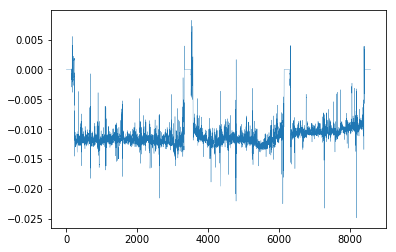

In [69]:
plt.plot(zm_full_matrix[0], linewidth=0.3);

In [71]:
zm_full_matrix[1]

array([ -3.18542325e-14,   1.31847497e-15,  -4.81068635e-15, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

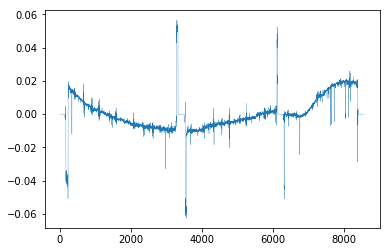

In [70]:
plt.plot(zm_full_matrix[1], linewidth=0.3);

In [72]:
zm_full_matrix[2]

array([ -3.12614450e-14,   1.32846657e-15,  -4.93690273e-15, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

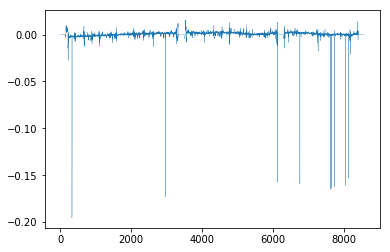

In [73]:
plt.plot(zm_full_matrix[2], linewidth=0.3);

In [74]:
zm_full_matrix[3]

array([ -2.91179197e-14,   1.39324310e-15,  -4.74395837e-15, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

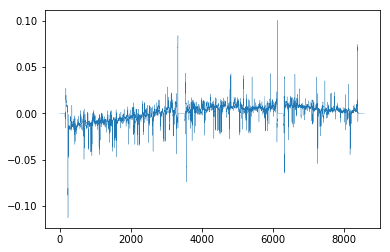

In [76]:
plt.plot(zm_full_matrix[3], linewidth=0.3);